## Libraries

In [1]:
#pip install mysql-connector-python
import mysql.connector
import pandas.io.sql as psql
import pandas as pd

import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import HTML


## Make the coneccion

In [2]:
conexion = mysql.connector.connect(user='root', password ='12345',
                                    host='localhost',
                                    database='nuevo_esquema',
                                    port='3306')
print(conexion)

## We make the query

In [3]:
Q1 = '''
SELECT 
    COUNT(DISTINCT t1.SalesOrderID) as transacciones,
    ROUND(SUM(t1.TotalDue),2) AS ventas
FROM nuevo_esquema.salesorderheader AS t1
	GROUP BY YEAR(t1.OrderDate),MONTH(t1.OrderDate)
    ORDER BY YEAR(t1.OrderDate),MONTH(t1.OrderDate);
'''
df = pd.read_sql_query(Q1, con=conexion)
conexion.close()

c:\Users\relat\.conda\envs\maestria\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
# We show the query
df.head(5)

,transacciones,ventas
0,43,665262.96
1,221,2573039.56
2,215,2104739.32
3,186,1642062.77
4,253,3666605.86


## Make the model : "Linear Regression"

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. The goal of linear regression is to find the line of best fit that can accurately predict the value of the dependent variable based on the values of the independent variables. This line of best fit is represented by a linear equation, which has the form Y = aX + b, where Y is the dependent variable, X is the independent variable, a is the slope of the line, and b is the y-intercept (the point at which the line crosses the y-axis). Linear regression can be used to make predictions, identify trends and patterns in data, and understand the impact of different variables on the dependent variable.

### We assign the values of x and y from the dataset


In [9]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values
# Here is the trick
X = X.reshape(-1,1) # Make the array

### We creake plots

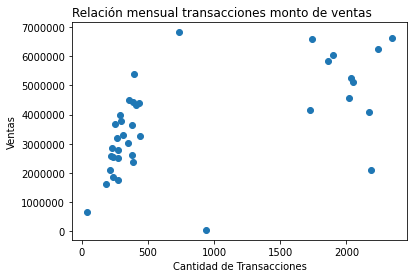

In [6]:
plt.scatter(X, y)
plt.xlabel("Cantidad de Transacciones")
plt.ylabel("Ventas")
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Relación mensual transacciones monto de ventas', loc='left')
plt.show()